# House Price Prediction System
## Using Random Forest Regressor for House Price Prediction

**Dataset:** House Prices: Advanced Regression Techniques

**Selected Features (6 from recommended 9):**
1. OverallQual - Overall material and finish quality
2. GrLivArea - Above grade (ground) living area in square feet
3. TotalBsmtSF - Total basement area in square feet
4. GarageCars - Size of garage in car capacity
5. YearBuilt - Original construction date
6. Neighborhood - Physical locations within Ames city limits

## Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


### Load Training Data

In [2]:
print("="*80)
print("HOUSE PRICE PREDICTION SYSTEM")
print("="*80)
print("\n[Step 1] Loading dataset...\n")

# Load training data
train_df = pd.read_csv('train.csv')
print(f"✓ Training data loaded: {train_df.shape[0]} samples, {train_df.shape[1]} features")

# Display basic information
print(f"\nDataset shape: {train_df.shape}")
print(f"\nFirst few rows:")
print(train_df.head())

HOUSE PRICE PREDICTION SYSTEM

[Step 1] Loading dataset...

✓ Training data loaded: 1460 samples, 81 features

Dataset shape: (1460, 81)

First few rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2

## Step 2: Data Preprocessing

### Select Features and Target Variable

In [3]:
print("\n" + "="*80)
print("[Step 2] Data Preprocessing")
print("="*80)

# Selected features (6 from the recommended 9)
selected_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 
                    'YearBuilt', 'Neighborhood']
target = 'SalePrice'

# Create a copy for processing
df = train_df[selected_features + [target]].copy()

print(f"\nSelected features: {selected_features}")
print(f"Target variable: {target}")
print(f"\nOriginal dataset shape: {df.shape}")


[Step 2] Data Preprocessing

Selected features: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Neighborhood']
Target variable: SalePrice

Original dataset shape: (1460, 7)


### 2a. Handling Missing Values

In [4]:
print("\n[2a] Handling Missing Values...")

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values per feature:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            # Fill numerical columns with median
            df[col].fillna(df[col].median(), inplace=True)
            print(f"  - {col}: filled with median")
        else:
            # Fill categorical columns with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"  - {col}: filled with mode")

print(f"\n✓ Missing values handled. Remaining: {df.isnull().sum().sum()}")


[2a] Handling Missing Values...

Missing values per feature:
No missing values found!

✓ Missing values handled. Remaining: 0


### 2b. Feature Selection

In [5]:
print("\n[2b] Feature Selection...")
print(f"✓ Selected 6 features from the recommended 9")
print(f"  Features: {selected_features}")

# Separate features and target
X = df[selected_features].copy()
y = df[target].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


[2b] Feature Selection...
✓ Selected 6 features from the recommended 9
  Features: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Neighborhood']

Feature matrix shape: (1460, 6)
Target vector shape: (1460,)


### 2c. Encoding Categorical Variables

In [6]:
print("\n[2c] Encoding Categorical Variables...")

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features found: {categorical_features}")

# Store encoders for later use
label_encoders = {}

if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
        print(f"  - {col}: encoded using LabelEncoder")
    print(f"\n✓ Categorical variables encoded")
else:
    print("No categorical variables found")

print(f"\nFeature data types after encoding:")
print(X.dtypes)


[2c] Encoding Categorical Variables...

Categorical features found: ['Neighborhood']
  - Neighborhood: encoded using LabelEncoder

✓ Categorical variables encoded

Feature data types after encoding:
OverallQual     int64
GrLivArea       int64
TotalBsmtSF     int64
GarageCars      int64
YearBuilt       int64
Neighborhood    int64
dtype: object


### 2d. Feature Scaling

In [7]:
print("\n[2d] Feature Scaling...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(f"✓ Features scaled using StandardScaler")
print(f"\nFeature statistics after scaling:")
print(f"  Mean: {X_scaled_df.mean().values}")
print(f"  Std: {X_scaled_df.std().values}")


[2d] Feature Scaling...
✓ Features scaled using StandardScaler

Feature statistics after scaling:
  Mean: [ 1.38701835e-16 -1.27751691e-16  2.45769919e-16  1.21668277e-16
  1.04634718e-15  8.33427695e-17]
  Std: [1.00034264 1.00034264 1.00034264 1.00034264 1.00034264 1.00034264]


## Step 3: Split Data for Training and Testing

In [8]:
print("\n" + "="*80)
print("[Step 3] Splitting Data for Training and Testing")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTrain set size: {X_train.shape[0]} samples (80%)")
print(f"Test set size: {X_test.shape[0]} samples (20%)")


[Step 3] Splitting Data for Training and Testing

Train set size: 1168 samples (80%)
Test set size: 292 samples (20%)


## Step 4: Train Machine Learning Model

In [9]:
print("\n" + "="*80)
print("[Step 4] Training Random Forest Regressor")
print("="*80)

# Initialize and train the model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

print("\nModel Configuration:")
print(f"  - Algorithm: Random Forest Regressor")
print(f"  - Number of trees: 100")
print(f"  - Max depth: 15")
print(f"  - Min samples split: 5")
print(f"  - Min samples leaf: 2")

print(f"\n✓ Training model...")
model.fit(X_train, y_train)
print(f"✓ Model training completed!")


[Step 4] Training Random Forest Regressor

Model Configuration:
  - Algorithm: Random Forest Regressor
  - Number of trees: 100
  - Max depth: 15
  - Min samples split: 5
  - Min samples leaf: 2

✓ Training model...
✓ Model training completed!


## Step 5: Evaluate the Model

In [10]:
print("\n" + "="*80)
print("[Step 5] Model Evaluation")
print("="*80)

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
print("\n[Training Set Performance]")
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"  Mean Absolute Error (MAE):  ${train_mae:,.2f}")
print(f"  Mean Squared Error (MSE):   ${train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${train_rmse:,.2f}")
print(f"  R² Score:                   {train_r2:.4f}")

# Calculate metrics for test set
print("\n[Test Set Performance]")
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"  Mean Absolute Error (MAE):  ${test_mae:,.2f}")
print(f"  Mean Squared Error (MSE):   ${test_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${test_rmse:,.2f}")
print(f"  R² Score:                   {test_r2:.4f}")


[Step 5] Model Evaluation

[Training Set Performance]
  Mean Absolute Error (MAE):  $10,448.24
  Mean Squared Error (MSE):   $290,672,846.76
  Root Mean Squared Error (RMSE): $17,049.13
  R² Score:                   0.9513

[Test Set Performance]
  Mean Absolute Error (MAE):  $18,732.43
  Mean Squared Error (MSE):   $878,470,745.40
  Root Mean Squared Error (RMSE): $29,639.01
  R² Score:                   0.8855


## Feature Importance Analysis


[Feature Importance Analysis]

Feature Importance Ranking:
  OverallQual    : 0.6024 (60.24%)
  GrLivArea      : 0.1902 (19.02%)
  TotalBsmtSF    : 0.0977 (9.77%)
  YearBuilt      : 0.0522 (5.22%)
  Neighborhood   : 0.0294 (2.94%)
  GarageCars     : 0.0280 (2.80%)


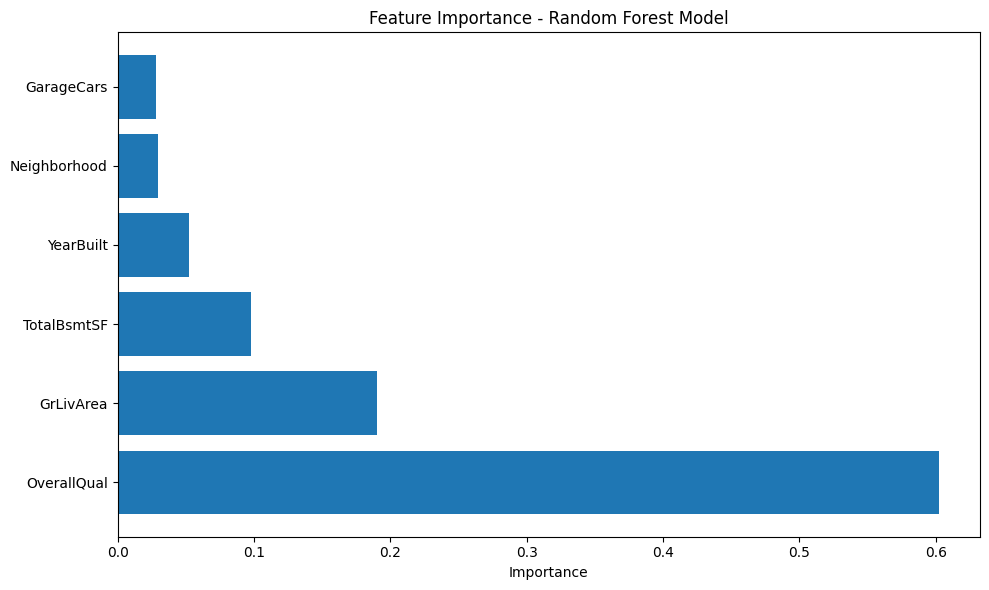

In [11]:
print("\n" + "="*80)
print("[Feature Importance Analysis]")
print("="*80)

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nFeature Importance Ranking:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']:15s}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Model')
plt.tight_layout()
plt.show()

## Step 6: Save the Model

In [12]:
print("\n" + "="*80)
print("[Step 6] Saving the Model")
print("="*80)

# Save the main model
model_filename = 'house_price_model.pkl'
joblib.dump(model, model_filename)
print(f"✓ Model saved to: {model_filename}")

# Save the scaler
scaler_filename = 'feature_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✓ Scaler saved to: {scaler_filename}")

# Save the label encoders
encoders_filename = 'label_encoders.pkl'
joblib.dump(label_encoders, encoders_filename)
print(f"✓ Label encoders saved to: {encoders_filename}")

# Save metadata
metadata = {
    'selected_features': selected_features,
    'target': target,
    'model_type': 'RandomForestRegressor',
    'test_r2_score': test_r2,
    'test_rmse': test_rmse,
    'test_mae': test_mae
}

metadata_filename = 'model_metadata.pkl'
joblib.dump(metadata, metadata_filename)
print(f"✓ Model metadata saved to: {metadata_filename}")


[Step 6] Saving the Model
✓ Model saved to: house_price_model.pkl
✓ Scaler saved to: feature_scaler.pkl
✓ Label encoders saved to: label_encoders.pkl
✓ Model metadata saved to: model_metadata.pkl


## Step 7: Verify Model Reload

In [13]:
print("\n" + "="*80)
print("[Step 7] Model Reload Verification")
print("="*80)

# Load the model
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_encoders = joblib.load(encoders_filename)
loaded_metadata = joblib.load(metadata_filename)

print(f"\n✓ Model successfully reloaded from: {model_filename}")
print(f"✓ Scaler successfully reloaded from: {scaler_filename}")
print(f"✓ Label encoders successfully reloaded from: {encoders_filename}")
print(f"✓ Metadata successfully reloaded from: {metadata_filename}")

# Verify the loaded model works
y_verify = loaded_model.predict(X_test)
verify_r2 = r2_score(y_test, y_verify)

print(f"\n[Verification Test]")
print(f"  Original model R² score: {test_r2:.4f}")
print(f"  Loaded model R² score:   {verify_r2:.4f}")
print(f"  Scores match: {np.isclose(test_r2, verify_r2)}")


[Step 7] Model Reload Verification

✓ Model successfully reloaded from: house_price_model.pkl
✓ Scaler successfully reloaded from: feature_scaler.pkl
✓ Label encoders successfully reloaded from: label_encoders.pkl
✓ Metadata successfully reloaded from: model_metadata.pkl

[Verification Test]
  Original model R² score: 0.8855
  Loaded model R² score:   0.8855
  Scores match: True


## Project Completion Summary

In [14]:
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)

print(f"""
✓ Data Loading: Complete
✓ Data Preprocessing: Complete
  - Handled missing values
  - Selected 6 features from recommended 9
  - Encoded categorical variables (Neighborhood)
  - Scaled features using StandardScaler

✓ Model Implementation: Random Forest Regressor
✓ Model Training: Complete
✓ Model Evaluation: Complete
  - Test MAE:  ${test_mae:,.2f}
  - Test RMSE: ${test_rmse:,.2f}
  - Test R²:   {test_r2:.4f}

✓ Model Persistence: Complete
  - Main model saved to: {model_filename}
  - Scaler saved to: {scaler_filename}
  - Encoders saved to: {encoders_filename}
  - Metadata saved to: {metadata_filename}

✓ Model Reload: Verified (Model works without retraining)

Project Status: SUCCESSFULLY COMPLETED
""")

print("="*80)


PROJECT COMPLETION SUMMARY

✓ Data Loading: Complete
✓ Data Preprocessing: Complete
  - Handled missing values
  - Selected 6 features from recommended 9
  - Encoded categorical variables (Neighborhood)
  - Scaled features using StandardScaler

✓ Model Implementation: Random Forest Regressor
✓ Model Training: Complete
✓ Model Evaluation: Complete
  - Test MAE:  $18,732.43
  - Test RMSE: $29,639.01
  - Test R²:   0.8855

✓ Model Persistence: Complete
  - Main model saved to: house_price_model.pkl
  - Scaler saved to: feature_scaler.pkl
  - Encoders saved to: label_encoders.pkl
  - Metadata saved to: model_metadata.pkl

✓ Model Reload: Verified (Model works without retraining)

Project Status: SUCCESSFULLY COMPLETED

